In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1198,5542-NKVRU,Female,0,No,No,42,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.75,844.45,No
2390,1226-JZNKR,Female,0,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.80,160.05,No
320,5020-ZSTTY,Female,1,No,No,54,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Yes,One year,No,Bank transfer (automatic),82.45,4350.1,Yes
70,2273-QCKXA,Male,0,No,No,1,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,No,Mailed check,49.05,49.05,No
554,5301-GAUUY,Male,0,No,No,32,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),80.35,2596.15,Yes


In [4]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
df.drop('customerID',axis='columns',inplace=True)

In [6]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [10]:
df.shape

(7043, 20)

In [11]:
df.iloc[488].TotalCharges

' '

In [12]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [13]:
df1=df[df.TotalCharges!=' ']

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [16]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

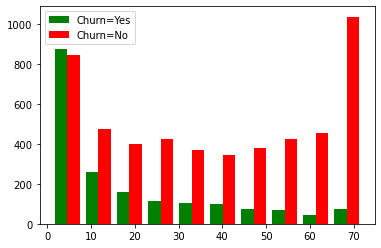

In [17]:
tenure_churn_no=df1[df1.Churn=="No"].tenure
tenure_churn_yes=df1[df1.Churn=="Yes"].tenure
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

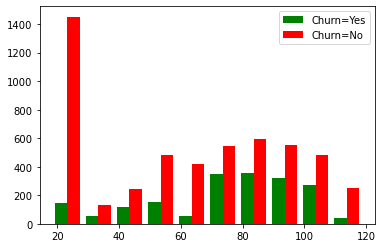

In [18]:
tenure_churn_no=df1[df1.Churn=="No"].MonthlyCharges
tenure_churn_yes=df1[df1.Churn=="Yes"].MonthlyCharges
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [19]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

In [20]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [21]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [22]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [23]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

In [24]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [25]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [26]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [27]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [28]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


# onehotencoding

In [29]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

In [30]:
df1.sample(2,random_state=43)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3940,0,0,0,0,19,0,0,DSL,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),25.15,468.35,0
3346,1,1,0,0,2,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,84.05,186.05,0


In [31]:
pd.get_dummies(data=df1,columns=['InternetService']).sample(2,random_state=43)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
3940,0,0,0,0,19,0,0,0,0,0,...,0,Month-to-month,1,Bank transfer (automatic),25.15,468.35,0,1,0,0
3346,1,1,0,0,2,1,1,0,0,0,...,1,Month-to-month,1,Electronic check,84.05,186.05,0,0,1,0


In [32]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

# MinMaxScaler

In [33]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [34]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [35]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

# train test split

In [36]:
X=df2.drop('Churn',axis='columns')
y=df2.Churn.astype(np.float32)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=15,stratify=y)

In [37]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [38]:
y_test.value_counts

<bound method IndexOpsMixin.value_counts of 6581    0.0
2317    0.0
3522    0.0
4533    0.0
162     0.0
       ... 
2981    0.0
6446    0.0
1457    0.0
3526    1.0
2498    0.0
Name: Churn, Length: 1407, dtype: float32>

In [39]:
5163/1869

2.7624398073836276

# Build a model (Artificial Neural Network) in tensorflow/keras

In [40]:
from tensorflow_addons import losses

In [41]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):
    model=keras.Sequential([
        keras.layers.Dense(26,input_dim=26,activation='relu'),
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')    
    ])
    model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
    if weights==-1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_trian,y_train,epochs=100,class_weights=weights)
    print(model.evaluate(X_test,y_test))
    
    y_preds=model.predict(X_test)
    y_preds=np.round(y_preds)
    
    print('Classification Report: \n', classification_report(y_test,y_preds))
    return y_preds

In [43]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 3s 2ms/step - loss: 0.5606 - accuracy: 0.6965
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.7918
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.7910
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8039
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.8021
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.8010
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8055
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8002
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8100
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4020 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3587 - accuracy: 0.8351
Epoch 81/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3620 - accuracy: 0.8288
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.8295
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.8389
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8251
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8248
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3678 - accuracy: 0.8263
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8366
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.8345
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 

In [44]:
26*26

676

In [45]:
X_train.shape

(5625, 26)

In [46]:
X_test.shape

(1407, 26)

# Mitigate Skewness of Data

1. Undersamplig

In [47]:
count_class_0,count_class_1=df1.Churn.value_counts()

df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

In [48]:
df_class_0.shape

(5163, 27)

In [49]:
df_class_1.shape

(1869, 27)

In [50]:
df_class_0_under=df_class_0.sample(count_class_1)

In [51]:
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)

In [52]:
df_test_under.Churn.value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [53]:
X=df_test_under.drop('Churn',axis='columns')
y=df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [54]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [55]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6624 - accuracy: 0.6016
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.7530
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5034 - accuracy: 0.7661
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4701 - accuracy: 0.7782
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7752
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.7731
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4755 - accuracy: 0.7763
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.7657
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4591 - accuracy: 0.7771
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7687
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8079
Epoch 83/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3957 - accuracy: 0.8203
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8082
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.8040
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8056
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.8135
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.8171
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.7966
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.7978
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.8200
Epoch 92/100


# OverSamping

In [62]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)

In [64]:
print('Random OverSampling')
print(df_test_over.Churn.value_counts())

Random OverSampling
1    5163
0    5163
Name: Churn, dtype: int64


In [68]:
X=df_test_over.drop('Churn',axis='columns')
y=df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [69]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [70]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.6013 - accuracy: 0.6961
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.7623
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5002 - accuracy: 0.7604
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7721
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.7655
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.7721
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4657 - accuracy: 0.7859
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.7834
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4783 - accuracy: 0.7647
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4744 - accura

Epoch 81/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3942 - accuracy: 0.8184
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3955 - accuracy: 0.8205
Epoch 83/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8195
Epoch 84/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3965 - accuracy: 0.8185
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3917 - accuracy: 0.8219
Epoch 86/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8221
Epoch 87/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.8241: 0s - loss: 0.3828 - accuracy
Epoch 88/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.8273
Epoch 89/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8253
Epoch 90/100
259/259 [==============================

# SMOTE

In [71]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [72]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')

X_sm,y_sm=smote.fit_resample(X,y)

In [76]:
y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)

In [79]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [80]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5848 - accuracy: 0.6992
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4810 - accuracy: 0.7700
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4683 - accuracy: 0.7740
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.7828
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7893
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4503 - accuracy: 0.7891
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4511 - accuracy: 0.7874
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.7898
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.7939
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4368 - accura

259/259 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8507
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3477 - accuracy: 0.8458
Epoch 83/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8428
Epoch 84/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.8424
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8502
Epoch 86/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.8462
Epoch 87/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8528
Epoch 88/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3398 - accuracy: 0.8502
Epoch 89/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8458
Epoch 90/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 